In [1]:
# 오토인코더를 개선
# 데이터는 cifar10

In [2]:
import numpy as np
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.layers import Input,Dense,Flatten,Reshape,Conv2D,Conv2DTranspose
from tensorflow.keras.models import Model

In [3]:
# Sequence 방식 Functionable API

In [4]:
(x_train,y_train),(x_test,y_test) = cifar10.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [5]:
x_train.shape

(50000, 32, 32, 3)

In [6]:
zdim = 32
# 오토인코더 인코더
encoder_input = Input(shape=(32, 32, 3))
x = Conv2D(32,(3,3),activation='relu', padding='same',strides=(1,1))(encoder_input)
x = Conv2D(64,(3,3),activation='relu',padding='same',strides=(2,2))(x)
x = Conv2D(64,(3,3),activation='relu',padding='same',strides=(2,2))(x)
x = Conv2D(64,(3,3),activation='relu',padding='same',strides=(1,1))(x)
x = Flatten()(x)
encoder_output = Dense(zdim)(x)
model_encoder = Model(encoder_input,encoder_output)
model_encoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 64)          36928     
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 4096)              0         
                                                                 
 dense (Dense)               (None, 32)                131104

In [7]:
# 디코더
decoder_input = Input(shape=(zdim,))
x = Dense(4096,activation='relu')(decoder_input)
x = Reshape((8, 8, 64))(x)
x = Conv2DTranspose(64,(3,3),activation='relu',padding='same',strides=(1,1))(x) 
x = Conv2DTranspose(64,(3,3),activation='relu',padding='same',strides=(2,2))(x) 
x = Conv2DTranspose(32,(3,3),activation='relu',padding='same',strides=(2,2))(x) 
x = Conv2DTranspose(3,(3,3),activation='sigmoid',padding='same',strides=(1,1))(x) 
decoder_output = x
model_decoder =  Model(decoder_input,decoder_output)
model_decoder.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32)]              0         
                                                                 
 dense_1 (Dense)             (None, 4096)              135168    
                                                                 
 reshape (Reshape)           (None, 8, 8, 64)          0         
                                                                 
 conv2d_transpose (Conv2DTra  (None, 8, 8, 64)         36928     
 nspose)                                                         
                                                                 
 conv2d_transpose_1 (Conv2DT  (None, 16, 16, 64)       36928     
 ranspose)                                                       
                                                                 
 conv2d_transpose_2 (Conv2DT  (None, 32, 32, 32)       1846

In [8]:
# 두개를 합쳐서 오토인코더를 결합
model_input = encoder_input
model_ouput = model_decoder(encoder_output)
model = Model(model_input,model_ouput)

In [9]:
import tensorflow as tf

In [ ]:
# 컴파일 , 학습, 예측
model.compile(optimizer='adam', loss = 'mse', metrics=['acc'])
earlyStop = tf.keras.callbacks.EarlyStopping(patience=3)
hist = model.fit(x_train,x_train,batch_size=128,epochs=30,validation_data=(x_test,x_test),callbacks=[earlyStop],shuffle=True)

In [ ]:
predict =  model.predict(x_test)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(8,8))
ax[0].imshow(x_test[0])
ax[1].imshow(predict[0])

In [17]:
from tensorflow.keras.preprocessing import image

In [18]:
help(image.load_img)

Help on function load_img in module keras.utils.image_utils:

load_img(path, grayscale=False, color_mode='rgb', target_size=None, interpolation='nearest', keep_aspect_ratio=False)
    Loads an image into PIL format.
    
    Usage:
    
    ```
    image = tf.keras.preprocessing.image.load_img(image_path)
    input_arr = tf.keras.preprocessing.image.img_to_array(image)
    input_arr = np.array([input_arr])  # Convert single image to a batch.
    predictions = model.predict(input_arr)
    ```
    
    Args:
        path: Path to image file.
        grayscale: DEPRECATED use `color_mode="grayscale"`.
        color_mode: One of `"grayscale"`, `"rgb"`, `"rgba"`. Default: `"rgb"`.
          The desired image format.
        target_size: Either `None` (default to original size) or tuple of ints
          `(img_height, img_width)`.
        interpolation: Interpolation method used to resample the image if the
          target size is different from that of the loaded image. Supported
         

In [19]:
image_path = '/content/drive/MyDrive/Colab Notebooks/cat.jpg'

In [20]:
img = image.load_img(image_path,target_size=(128 ,128))

In [21]:
img_data = image.img_to_array(img)

In [22]:
img_data = img_data.astype('float32') / 255.0

In [23]:
plt.matshow(img_data)

NameError: ignored

In [24]:
# 128용으로 모델생성
zdim = 32
# 오토인코더 인코더
encoder_input = Input(shape=(128, 128, 3))
x = Conv2D(32,(3,3),activation='relu', padding='same',strides=(1,1))(encoder_input)
x = Conv2D(64,(3,3),activation='relu',padding='same',strides=(2,2))(x)
x = Conv2D(64,(3,3),activation='relu',padding='same',strides=(2,2))(x)
x = Conv2D(64,(3,3),activation='relu',padding='same',strides=(1,1))(x)
x = Flatten()(x)
encoder_output = Dense(zdim)(x)
model_encoder = Model(encoder_input,encoder_output)
model_encoder.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 conv2d_4 (Conv2D)           (None, 128, 128, 32)      896       
                                                                 
 conv2d_5 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 conv2d_6 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 flatten_1 (Flatten)         (None, 65536)             0         
                                                                 
 dense_2 (Dense)             (None, 32)                2097

In [25]:
# 디코더
decoder_input = Input(shape=(zdim,))
x = Dense(65536,activation='relu')(decoder_input)
x = Reshape((32, 32, 64))(x)
x = Conv2DTranspose(64,(3,3),activation='relu',padding='same',strides=(1,1))(x) 
x = Conv2DTranspose(64,(3,3),activation='relu',padding='same',strides=(2,2))(x) 
x = Conv2DTranspose(32,(3,3),activation='relu',padding='same',strides=(2,2))(x) 
x = Conv2DTranspose(3,(3,3),activation='sigmoid',padding='same',strides=(1,1))(x) 
decoder_output = x
model_decoder =  Model(decoder_input,decoder_output)
model_decoder.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 32)]              0         
                                                                 
 dense_3 (Dense)             (None, 65536)             2162688   
                                                                 
 reshape_1 (Reshape)         (None, 32, 32, 64)        0         
                                                                 
 conv2d_transpose_4 (Conv2DT  (None, 32, 32, 64)       36928     
 ranspose)                                                       
                                                                 
 conv2d_transpose_5 (Conv2DT  (None, 64, 64, 64)       36928     
 ranspose)                                                       
                                                                 
 conv2d_transpose_6 (Conv2DT  (None, 128, 128, 32)     1846

In [26]:
# 두개를 합쳐서 오토인코더를 결합
model_input = encoder_input
model_ouput = model_decoder(encoder_output)
model = Model(model_input,model_ouput)

In [27]:
# 컴파일 , 학습, 예측
model.compile(optimizer='adam', loss = 'mse', metrics=['acc'])
earlyStop = tf.keras.callbacks.EarlyStopping(patience=3)
img_data.shape
# hist = model.fit(x_train,x_train,batch_size=128,epochs=30,validation_data=(x_test,x_test),callbacks=[earlyStop],shuffle=True)

(128, 128, 3)

In [28]:
x_train.shape

(50000, 32, 32, 3)

In [29]:
img_data = np.expand_dims(img_data,axis=0)
img_data.shape

(1, 128, 128, 3)

In [30]:
model.fit(img_data,img_data,batch_size=128,epochs=30,callbacks=[earlyStop],shuffle=True)

Epoch 1/30
1/1 [==============================] - ETA: 0s - loss: 0.0677 - acc: 0.6072

1/1 [==============================] - 29s 29s/step - loss: 0.0677 - acc: 0.6072
Epoch 2/30
1/1 [==============================] - ETA: 0s - loss: 0.0675 - acc: 0.9907

1/1 [==============================] - 0s 17ms/step - loss: 0.0675 - acc: 0.9907
Epoch 3/30
1/1 [==============================] - ETA: 0s - loss: 0.0672 - acc: 0.9899

1/1 [==============================] - 0s 17ms/step - loss: 0.0672 - acc: 0.9899
Epoch 4/30
1/1 [==============================] - ETA: 0s - loss: 0.0668 - acc: 0.9774

1/1 [==============================] - 0s 16ms/step - loss: 0.0668 - acc: 0.9774
Epoch 5/30
1/1 [==============================] - ETA: 0s - loss: 0.0658 - acc: 0.9465

1/1 [==============================] - 0s 15ms/step - loss: 0.0658 - acc: 0.9465
Epoch 6/30
1/1 [==============================] - ETA: 0s - loss: 0.0627 - acc: 0.9246

1/1 [==============================] - 0s 14ms/step - loss: 0.0627 - acc: 0.9246
Epoch 7/30
1/1 [==============================] - ETA: 0s - loss: 0.0523 - acc: 0.9238

1/1 [==============================] - 0s 16ms/step - loss: 0.0523 - acc: 0.9238
Epoch 8/30
1/1 [==============================] - ETA: 0s - loss: 0.0396 - acc: 0.9315

1/1 [==============================] - 0s 16ms/step - loss: 0.0396 - acc: 0.9315
Epoch 9/30
1/1 [==============================] - ETA: 0s - loss: 0.0410 - acc: 0.9611

1/1 [==============================] - 0s 16ms/step - loss: 0.0410 - acc: 0.9611
Epoch 10/30
1/1 [==============================] - ETA: 0s - loss: 0.0311 - acc: 0.9863

1/1 [==============================] - 0s 15ms/step - loss: 0.0311 - acc: 0.9863
Epoch 11/30
1/1 [==============================] - ETA: 0s - loss: 0.0273 - acc: 0.9933

1/1 [==============================] - 0s 18ms/step - loss: 0.0273 - acc: 0.9933
Epoch 12/30
1/1 [==============================] - ETA: 0s - loss: 0.0273 - acc: 0.9934

1/1 [==============================] - 0s 15ms/step - loss: 0.0273 - acc: 0.9934
Epoch 13/30
1/1 [==============================] - ETA: 0s - loss: 0.0259 - acc: 0.9929

1/1 [==============================] - 0s 16ms/step - loss: 0.0259 - acc: 0.9929
Epoch 14/30
1/1 [==============================] - ETA: 0s - loss: 0.0248 - acc: 0.9918

1/1 [==============================] - 0s 15ms/step - loss: 0.0248 - acc: 0.9918
Epoch 15/30
1/1 [==============================] - ETA: 0s - loss: 0.0251 - acc: 0.9901

1/1 [==============================] - 0s 15ms/step - loss: 0.0251 - acc: 0.9901
Epoch 16/30
1/1 [==============================] - ETA: 0s - loss: 0.0246 - acc: 0.9881

1/1 [==============================] - 0s 14ms/step - loss: 0.0246 - acc: 0.9881
Epoch 17/30
1/1 [==============================] - ETA: 0s - loss: 0.0233 - acc: 0.9868

1/1 [==============================] - 0s 16ms/step - loss: 0.0233 - acc: 0.9868
Epoch 18/30
1/1 [==============================] - ETA: 0s - loss: 0.0227 - acc: 0.9861

1/1 [==============================] - 0s 16ms/step - loss: 0.0227 - acc: 0.9861
Epoch 19/30
1/1 [==============================] - ETA: 0s - loss: 0.0225 - acc: 0.9862

1/1 [==============================] - 0s 14ms/step - loss: 0.0225 - acc: 0.9862
Epoch 20/30
1/1 [==============================] - ETA: 0s - loss: 0.0217 - acc: 0.9848

1/1 [==============================] - 0s 17ms/step - loss: 0.0217 - acc: 0.9848
Epoch 21/30
1/1 [==============================] - ETA: 0s - loss: 0.0206 - acc: 0.9822

1/1 [==============================] - 0s 15ms/step - loss: 0.0206 - acc: 0.9822
Epoch 22/30
1/1 [==============================] - ETA: 0s - loss: 0.0201 - acc: 0.9783

1/1 [==============================] - 0s 17ms/step - loss: 0.0201 - acc: 0.9783
Epoch 23/30
1/1 [==============================] - ETA: 0s - loss: 0.0195 - acc: 0.9742

1/1 [==============================] - 0s 15ms/step - loss: 0.0195 - acc: 0.9742
Epoch 24/30
1/1 [==============================] - ETA: 0s - loss: 0.0183 - acc: 0.9722

1/1 [==============================] - 0s 18ms/step - loss: 0.0183 - acc: 0.9722
Epoch 25/30
1/1 [==============================] - ETA: 0s - loss: 0.0172 - acc: 0.9710

1/1 [==============================] - 0s 16ms/step - loss: 0.0172 - acc: 0.9710
Epoch 26/30
1/1 [==============================] - ETA: 0s - loss: 0.0165 - acc: 0.9675

1/1 [==============================] - 0s 16ms/step - loss: 0.0165 - acc: 0.9675
Epoch 27/30
1/1 [==============================] - ETA: 0s - loss: 0.0153 - acc: 0.9619

1/1 [==============================] - 0s 20ms/step - loss: 0.0153 - acc: 0.9619
Epoch 28/30
1/1 [==============================] - ETA: 0s - loss: 0.0141 - acc: 0.9548

1/1 [==============================] - 0s 18ms/step - loss: 0.0141 - acc: 0.9548
Epoch 29/30
1/1 [==============================] - ETA: 0s - loss: 0.0133 - acc: 0.9496

1/1 [==============================] - 0s 16ms/step - loss: 0.0133 - acc: 0.9496
Epoch 30/30
1/1 [==============================] - ETA: 0s - loss: 0.0122 - acc: 0.9474

1/1 [==============================] - 0s 19ms/step - loss: 0.0122 - acc: 0.9474


In [31]:
predict = model.predict(img_data)

1/1 [==============================] - 0s 230ms/step


In [32]:
predict.shape

(1, 128, 128, 3)

In [33]:
np.squeeze(img_data).shape, np.squeeze(predict).shape

((128, 128, 3), (128, 128, 3))

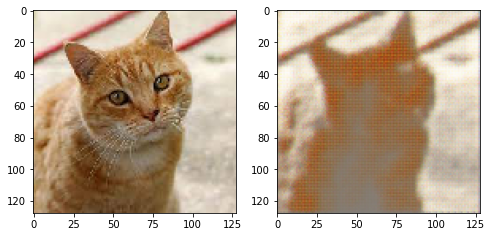

In [35]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,2,figsize=(8,8))
ax[0].imshow(np.squeeze(img_data))
ax[1].imshow(np.squeeze(predict))